## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
import random
import time
import numpy as np
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros
from random import randrange

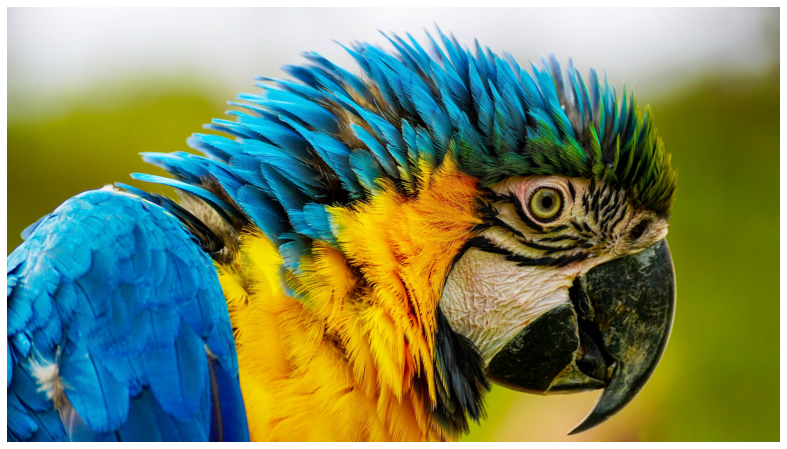

In [25]:
# Load an image.
imagex = image.imread("parrot.jpeg")
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [26]:
random.seed(0)
centroids = []
cluster_labels = []

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []


totalErrorMargin = 1
cluster_count = 5

#Get a random sample
samples = random.sample(range(len(image_2d)),cluster_count)

#Get the corresponding values from the 2dImage and stores these as the centroids
for i in samples:
    centroids.append(image_2d[i])


#Calculate the distance between the centroids and the current position
def get_distance(i,j):
    centroids
    return math.sqrt((image_2d[i][0] - centroids[j][0])**2 +(image_2d[i][1] - centroids[j][1])**2 +\
                (image_2d[i][2] - centroids[j][2])**2)


#Get the closest centroid to the position
def get_closest_Centroid(i):
    count = get_distance(i,0)
    val = 0
    for j in range(1,len(centroids)):
        tmp = get_distance(i,j)
        if tmp < count:
            count = tmp
            val = j
    return val 

#Get the mean average of the clusters
def get_mean(cluster):
    tmp = []
    tmp.append(np.mean([cluster[i][0] for i in range(len(cluster))]))
    tmp.append(np.mean([cluster[i][1] for i in range(len(cluster))]))
    tmp.append(np.mean([cluster[i][2] for i in range(len(cluster))]))
    return tmp

#For each each point in the 2d image append it to its nearest cluster
def loop():
    global cluster_labels, cluster0, cluster1, cluster2, cluster3, cluster4 
    cluster0
    cluster1 = []
    cluster2 = []
    cluster3 = []
    cluster4 = []
    cluster_labels = []
    
    for i in range(len(image_2d)):
        val = get_closest_Centroid(i)
        cluster_labels.append(val)
        if val == 0:
            cluster0.append(image_2d[i])
        elif val == 1:
            cluster1.append(image_2d[i])
        elif val == 2:
            cluster2.append(image_2d[i])        
        elif val == 3:
            cluster3.append(image_2d[i])
        else:
            cluster4.append(image_2d[i])

prevDiff = 0
start_time = time.time()

#While the error margin is not less than 1 get the mean average of the clusters and loop to re classify the points
while True:
    cluster_labels = []
    currDiff = np.sum(centroids)
    loop()
    print("error margin", abs(currDiff - prevDiff))
    if abs(currDiff - prevDiff) < totalErrorMargin:
        break
    centroids[0] = get_mean(cluster0)
    centroids[1] = get_mean(cluster1)
    centroids[2] = get_mean(cluster2)
    centroids[3] = get_mean(cluster3)
    centroids[4] = get_mean(cluster4)
    prevDiff = currDiff
print("elapsed time", time.time() - start_time)

<ipython-input-26-ddd321a02573>:21: RuntimeWarning: overflow encountered in ubyte_scalars
  return math.sqrt((image_2d[i][0] - centroids[j][0])**2 +(image_2d[i][1] - centroids[j][1])**2 +\
<ipython-input-26-ddd321a02573>:22: RuntimeWarning: overflow encountered in ubyte_scalars
  (image_2d[i][2] - centroids[j][2])**2)


error margin 1580.0
error margin 103.25019661393912
error margin 6.394034078758523
error margin 19.515511685437104
error margin 12.16642814088982
error margin 7.637865919493379
error margin 5.283391499181562
error margin 3.69577932645052
error margin 2.6449735293469985
error margin 2.0596509502622666
error margin 1.927804864476684
error margin 1.5765818631537059
error margin 1.3586913784845365
error margin 1.2535026677348924
error margin 1.1440246592267158
error margin 1.003636462229906
error margin 0.8495138204320938
elapsed time 3822.91237783432


In [27]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

"""
[105. 111.   2.   0.]
[219. 222. 228.   1.]
[  3. 121. 180.   2.]
[213. 164.   5.   3.]
[17. 28. 14.  4.]
"""


[  5. 151. 199.   0.]
[220. 223. 228.   1.]
[82. 78.  3.  2.]
[190. 156.   5.   3.]
[  1.  85. 136.   4.]


'\n[105. 111.   2.   0.]\n[219. 222. 228.   1.]\n[  3. 121. 180.   2.]\n[213. 164.   5.   3.]\n[17. 28. 14.  4.]\n'

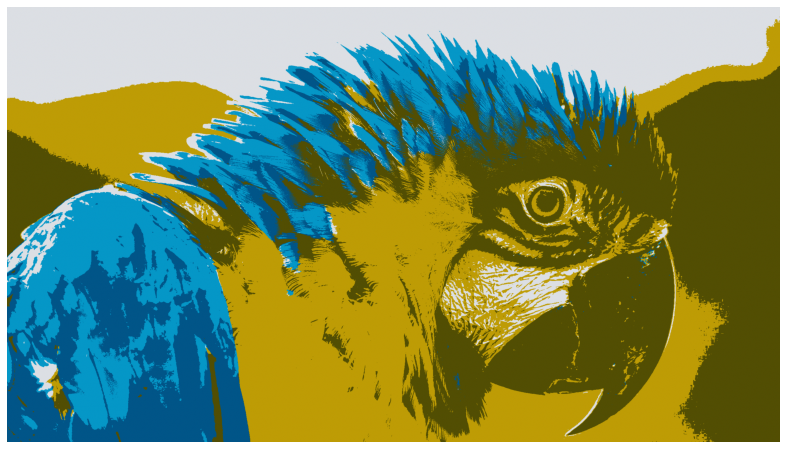

In [28]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')